In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import os
import random
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import Dense, Flatten



In [2]:
dogscats = './dogscats/'
train_dir = './dogscats/train/'
valid_dir = './dogscats/valid/'
test_dir = './dogscats/test1/'


In [3]:
train_cats = os.path.join(train_dir,'cats/')
train_dogs = os.path.join(train_dir,'dogs/')
valid_cats = os.path.join(valid_dir,'cats/')
valid_dogs = os.path.join(valid_dir,'dogs/')


In [4]:
a = len(os.listdir(train_cats))
b = len(os.listdir(train_dogs))
c = len(os.listdir(valid_cats))
d = len(os.listdir(valid_dogs))
e = len(os.listdir(test_dir))

print(a,b,c,d,e)

11500 11500 1000 1000 12500


In [5]:
os.listdir(test_dir)

['1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.

In [6]:
train_data_cats = [train_cats + file_name for file_name in os.listdir(train_cats)]
train_data_dogs = [train_dogs + file_name for file_name in os.listdir(train_dogs)]
val_data_cats = [valid_cats + file_name for file_name in os.listdir(valid_cats)]
val_data_dogs = [valid_dogs + file_name for file_name in os.listdir(valid_dogs)]
total_train_data = train_data_cats + train_data_dogs
total_val_data = val_data_cats + val_data_dogs
total_val_data

['./dogscats/valid/cats/cat.1001.jpg',
 './dogscats/valid/cats/cat.10016.jpg',
 './dogscats/valid/cats/cat.10026.jpg',
 './dogscats/valid/cats/cat.10048.jpg',
 './dogscats/valid/cats/cat.10050.jpg',
 './dogscats/valid/cats/cat.10064.jpg',
 './dogscats/valid/cats/cat.10071.jpg',
 './dogscats/valid/cats/cat.10091.jpg',
 './dogscats/valid/cats/cat.10103.jpg',
 './dogscats/valid/cats/cat.10104.jpg',
 './dogscats/valid/cats/cat.10107.jpg',
 './dogscats/valid/cats/cat.10127.jpg',
 './dogscats/valid/cats/cat.10131.jpg',
 './dogscats/valid/cats/cat.10133.jpg',
 './dogscats/valid/cats/cat.10145.jpg',
 './dogscats/valid/cats/cat.10152.jpg',
 './dogscats/valid/cats/cat.10154.jpg',
 './dogscats/valid/cats/cat.10158.jpg',
 './dogscats/valid/cats/cat.10166.jpg',
 './dogscats/valid/cats/cat.10204.jpg',
 './dogscats/valid/cats/cat.10221.jpg',
 './dogscats/valid/cats/cat.10265.jpg',
 './dogscats/valid/cats/cat.10267.jpg',
 './dogscats/valid/cats/cat.10293.jpg',
 './dogscats/valid/cats/cat.103.jpg',
 '.

In [8]:
print('total training cat images:', len(train_data_cats))
print('total training dog images:', len(train_data_dogs))

print('total validation cat images:', len(val_data_cats))
print('total validation dog images:', len(val_data_dogs))
print("--")
print("Total training images:", len(total_train_data))
print("Total validation images:", len(total_val_data))


total training cat images: 11500
total training dog images: 11500
total validation cat images: 1000
total validation dog images: 1000
--
Total training images: 23000
Total validation images: 2000


In [33]:
total_train_data[:10]

['./dogscats/train/dogs/dog.689.jpg',
 './dogscats/train/cats/cat.7716.jpg',
 './dogscats/train/dogs/dog.11704.jpg',
 './dogscats/train/dogs/dog.1076.jpg',
 './dogscats/train/dogs/dog.11305.jpg',
 './dogscats/train/cats/cat.11999.jpg',
 './dogscats/train/dogs/dog.11371.jpg',
 './dogscats/train/dogs/dog.2969.jpg',
 './dogscats/train/dogs/dog.7096.jpg',
 './dogscats/train/cats/cat.4431.jpg']

In [31]:
import random
image_count = len(total_train_data)
random.shuffle(total_train_data)
random.shuffle(total_val_data)


TypeError: 'NoneType' object is not subscriptable

In [44]:
total_train_data[:10]

['./dogscats/train/dogs/dog.689.jpg',
 './dogscats/train/cats/cat.7716.jpg',
 './dogscats/train/dogs/dog.11704.jpg',
 './dogscats/train/dogs/dog.1076.jpg',
 './dogscats/train/dogs/dog.11305.jpg',
 './dogscats/train/cats/cat.11999.jpg',
 './dogscats/train/dogs/dog.11371.jpg',
 './dogscats/train/dogs/dog.2969.jpg',
 './dogscats/train/dogs/dog.7096.jpg',
 './dogscats/train/cats/cat.4431.jpg']

In [49]:
total_val_data[:10]

['./dogscats/valid/dogs/dog.11351.jpg',
 './dogscats/valid/dogs/dog.7822.jpg',
 './dogscats/valid/dogs/dog.249.jpg',
 './dogscats/valid/dogs/dog.3113.jpg',
 './dogscats/valid/cats/cat.716.jpg',
 './dogscats/valid/dogs/dog.4505.jpg',
 './dogscats/valid/dogs/dog.10757.jpg',
 './dogscats/valid/dogs/dog.2102.jpg',
 './dogscats/valid/cats/cat.8508.jpg',
 './dogscats/valid/cats/cat.5545.jpg']

In [9]:
img_path = total_train_data[20000]
img_raw = tf.io.read_file(img_path)
img_tensor = tf.image.decode_jpeg(img_raw, channels=3)
img_tensor.dtype


tf.uint8

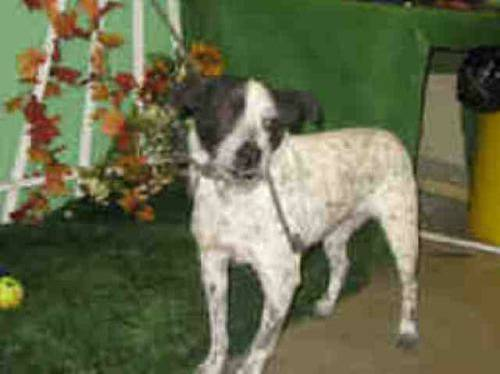

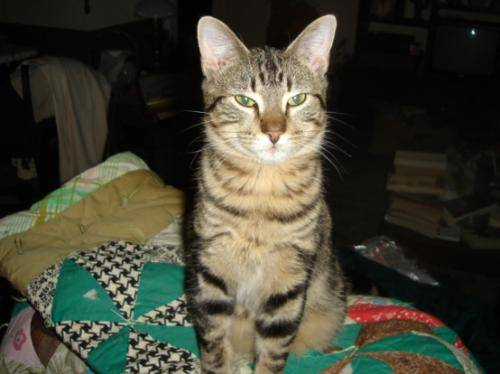

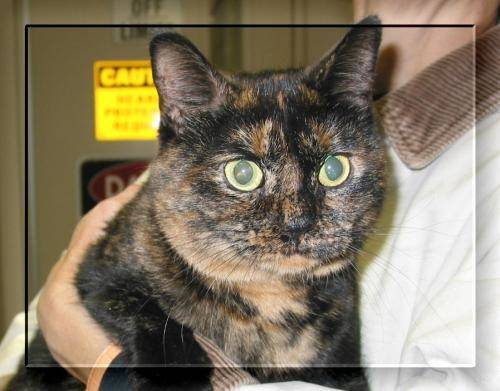

In [27]:
import IPython.display as display

for n in range(3):
    image_path = random.choice(total_train_data)
    display.display(display.Image(image_path))
    print()

In [35]:
label_names = os.listdir(train_dir)

In [46]:
total_label_name=[]
for i in total_train_data:
    if 'dog.' in i:
        total_label_name.append(0)
    else:
        total_label_name.append(1)
len(total_label_name)

23000

In [47]:
total_label_name[:10]

[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]

In [50]:
val_label_name=[]
for i in total_val_data:
    if 'dog.' in i:
        val_label_name.append(0)
    else:
        val_label_name.append(1)
len(val_label_name)

2000

In [70]:
val_label_name[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 1, 1]

In [13]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1./255)
# val_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     target_size=(64,64),
#                                                     batch_size=64,
#                                                     class_mode='binary')
# validation_generator = val_datagen.flow_from_directory(valid_dir,
#                                                        target_size =(64,64),
#                                                        batch_size=64,
#                                                        class_mode='binary')


In [52]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  # normalize to [0,1] range
    image = 2*image-1  # normalize to [-1,1] range

    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


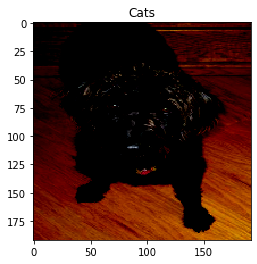

In [56]:
import matplotlib.pyplot as plt

image_path = total_train_data[100]
label = total_label_name[100]

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
plt.title(label_names[label].title())
plt.show()

In [71]:
total_train_data[:10]

['./dogscats/train/dogs/dog.689.jpg',
 './dogscats/train/cats/cat.7716.jpg',
 './dogscats/train/dogs/dog.11704.jpg',
 './dogscats/train/dogs/dog.1076.jpg',
 './dogscats/train/dogs/dog.11305.jpg',
 './dogscats/train/cats/cat.11999.jpg',
 './dogscats/train/dogs/dog.11371.jpg',
 './dogscats/train/dogs/dog.2969.jpg',
 './dogscats/train/dogs/dog.7096.jpg',
 './dogscats/train/cats/cat.4431.jpg']

In [73]:
total_val_data[:10]

['./dogscats/valid/dogs/dog.11351.jpg',
 './dogscats/valid/dogs/dog.7822.jpg',
 './dogscats/valid/dogs/dog.249.jpg',
 './dogscats/valid/dogs/dog.3113.jpg',
 './dogscats/valid/cats/cat.716.jpg',
 './dogscats/valid/dogs/dog.4505.jpg',
 './dogscats/valid/dogs/dog.10757.jpg',
 './dogscats/valid/dogs/dog.2102.jpg',
 './dogscats/valid/cats/cat.8508.jpg',
 './dogscats/valid/cats/cat.5545.jpg']

In [57]:
# Put the image's paths and labels of train and test set to tensorflow dataset.

train_path_label = tf.data.Dataset.from_tensor_slices((total_train_data, total_label_name))
val_path_label = tf.data.Dataset.from_tensor_slices((total_val_data, val_label_name))
train_path_label

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [58]:
# Load and preprocess all the images, put it in the same place with their labels.

train_image_label_ds = train_path_label.map(load_and_preprocess_from_path_label)
val_image_label_ds = val_path_label.map(load_and_preprocess_from_path_label).batch(1)
train_image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [59]:
len(total_train_data)

23000

In [60]:
# implement batch for train set.
image_count = len(total_train_data)
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_image_label_ds.shuffle(buffer_size = image_count)
train_ds = train_ds.repeat()
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [61]:
train_ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [62]:

mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

In [63]:
cnn_model = tf.keras.models.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
opt = tf.keras.optimizers.Adam(lr=0.001)
cnn_model.compile(optimizer= opt,
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [21]:
# def create_model():
# #     Xception = tf.keras.applications.Xception(include_top=False, input_shape=(128,128,3))
# #     Xception.trainable=False
#     model = tf.keras.models.Sequential([
# #         Xception,
#         tf.keras.layers.Conv2D(32,(3,3), input_shape=(128,128,3), activation ='relu'),
#         tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
#         tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
#         tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
# #         tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
# #         tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(units=128, activation = 'relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(units=1, activation = 'sigmoid')
        
#     ])
    
#     opt = tf.keras.optimizers.Adam(lr=0.001)
#     model.compile(optimizer= opt,
#                   loss='binary_crossentropy',
#                   metrics = ['accuracy'])
#     return model
   

# model = create_model()
    
    
    

In [64]:
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,340,033
Trainable params: 82,049
Non-trainable params: 2,257,984
_________________________________________________________________


In [66]:
steps_per_epoch=tf.math.ceil(image_count/BATCH_SIZE).numpy()
# steps_per_epoch = 20.0
# steps_per_epoch.numpy()
steps_per_epoch

719.0

In [67]:
steps_per_epoch=tf.math.ceil(image_count/BATCH_SIZE).numpy()

history = cnn_model.fit(train_ds,
                    steps_per_epoch=steps_per_epoch,
                    epochs=1,
                    validation_data=val_image_label_ds)

Train for 719.0 steps, validate for 2000 steps
719/719 [==============================] - 3303s 5s/step - loss: 0.1320 - accuracy: 0.9474 - val_loss: 0.0584 - val_accuracy: 0.9810


In [ ]:
model.evaluate()

C:\Users\HT\Miniconda3\envs\cs_ftmle\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  app.launch_new_instance()


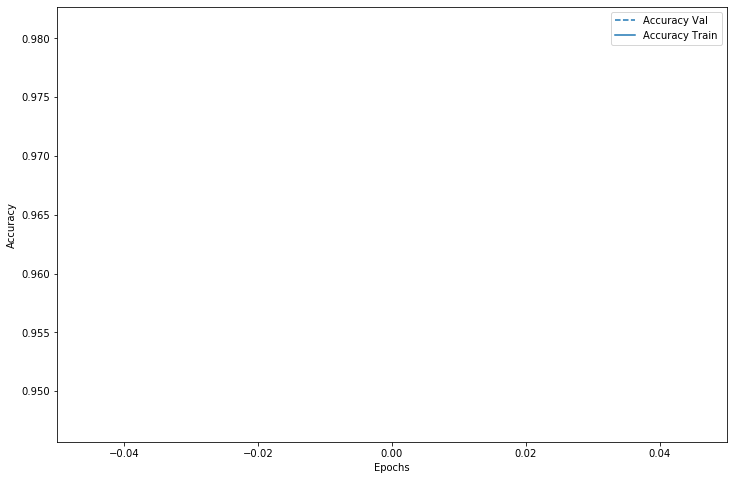

In [68]:
import matplotlib.pyplot as plt

# Visualize model history
def plot_history(history, key='loss'):
    plt.figure(figsize=(12,8))

    val = plt.plot(history.epoch, history.history['val_'+ key],
                    '--', label=key.title() +' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=key.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history(history, key='accuracy')

In [74]:
cnn_model.save('catdog_classi.h5')

In [75]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
# by default it saves the weights every epoch
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
cp_callback

In [ ]:
# Train the model with the new callback
history = model.fit(train_ds, 
                    steps_per_epoch=steps_per_epoch,,  
                    epochs=2,
                    validation_data=val_image_label_ds,
                    callbacks=[cp_callback])  # Pass callback to training

In [ ]:
# Create a basic model instance
new_model = create_model()

# Evaluate the model
loss, acc = new_model.evaluate(test_dataset)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

In [ ]:
# Loads the weights
new_model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = new_model.evaluate(test_dataset)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))